In [1]:
from pathlib import Path

import util
from util import workflow

browser = False
file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")

In [2]:
from util import p_

import automech

mech0 = automech.io.read(
    p_.original_mechanism(tag, ext="json", path=p_.data(root_path))
)
mech = automech.io.read(
    p_.mechanism(tag, ext="json", path=p_.data(root_path))
)
print(automech.reaction_count(mech0))
print(automech.reaction_count(mech))

automech.display(mech)

4
6


In [2]:
# # Build
# from automol.graph import enum

# import automech
# from automech.species import Species

# par_mech = workflow.read_parent_mechanism(root_path=root_path)
# mech = automech.from_smiles(
#     spc_smis=["C1=C[CH]CC1", "C1=CC[CH]C1"],
#     src_mech=par_mech,
# )
# #  - O2 additions
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.o2_addition,
#     rcts_=[None, "[O][O]"],
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )
# #  - HO2 elimination
# mech = automech.enumerate_reactions(
#     mech,
#     enum.ReactionSmarts.ho2_elimination,
#     spc_col_=Species.smiles,
#     src_mech=par_mech,
# )
# #  - drop alpha HO2 elimination that we can't currently handle
# mech = automech.drop_reactions_by_smiles(
#     # >> all TSs converge to VDW SPs:
#     mech, rxn_smis=["[O]OC1C=CCC1>>C=1=CCCC=1.[O]O"]
# )
# automech.display(mech)

In [3]:
# # Write
# workflow.write(mech=mech, tag=tag, root_path=root_path, browser=browser)

In [4]:
# # Read
# workflow.prepare_simulation(tag=tag, root_path=root_path)

name: C5H8(522)
smiles: C1CC=CC1


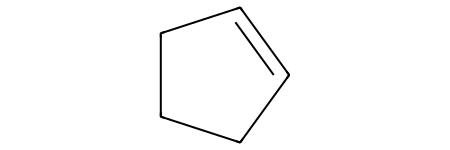

alt.LayerChart(...)

name: C5H8O(825)
smiles: O1C2C1CCC2


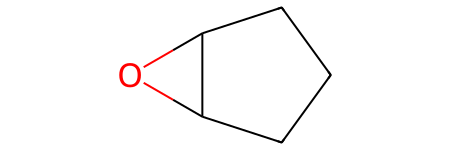

alt.LayerChart(...)

name: CPT(563)
smiles: C1CCCC1


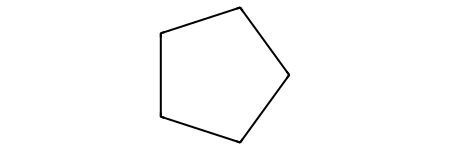

alt.LayerChart(...)

name: O2(6)
smiles: O=O


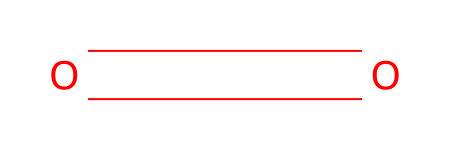

alt.LayerChart(...)

name: H2(2)
smiles: [H][H]


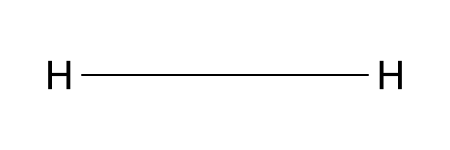

alt.LayerChart(...)

name: H2O(5)
smiles: O


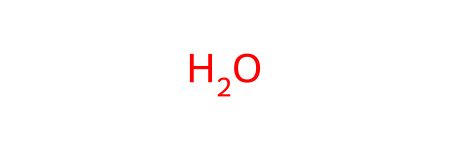

alt.LayerChart(...)

name: CO(12)
smiles: O=[C]


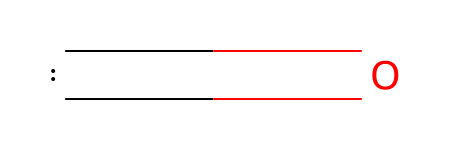

alt.LayerChart(...)

name: CO2(13)
smiles: O=C=O


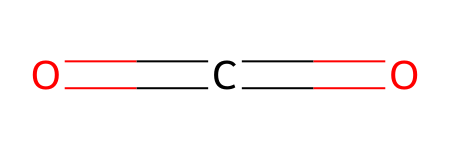

alt.LayerChart(...)

name: CH4(33)
smiles: C


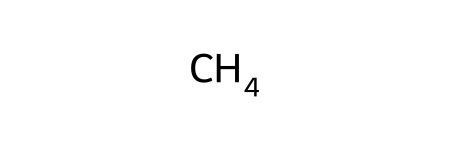

alt.LayerChart(...)

name: CH3CHO(41)
smiles: O=CC


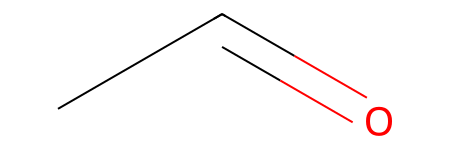

alt.LayerChart(...)

name: C2H4(52)
smiles: C=C


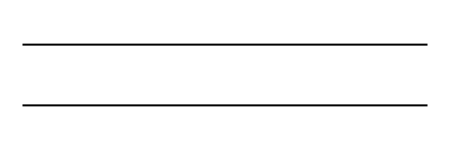

alt.LayerChart(...)

name: C3H6(131)
smiles: CC=C


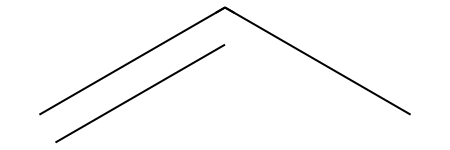

alt.LayerChart(...)

name: C3H4O(165)
smiles: O=CC=C


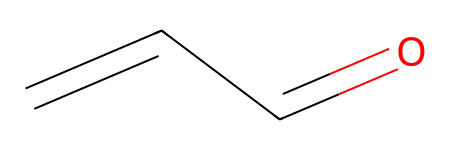

alt.LayerChart(...)

name: C4H6(227)
smiles: C=CC=C


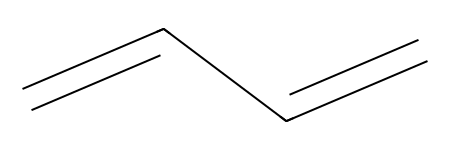

alt.LayerChart(...)

name: C4H8(253)
smiles: CCC=C


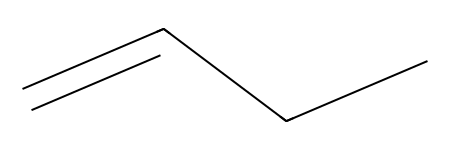

alt.LayerChart(...)

name: C5H6(478)
smiles: C=1C=CCC=1


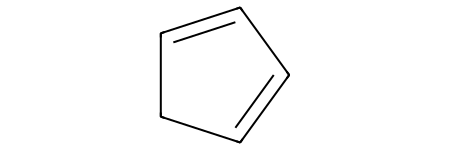

alt.LayerChart(...)

name: C6H6(970)
smiles: C1=CC=CC=C1


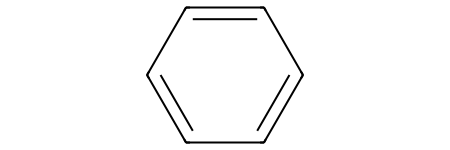

alt.LayerChart(...)

In [5]:
from util import p_

import automech

# Plot
chart_dct = workflow.plot_simulation(
    tag=tag,
    x_col="O2_molecules",
    root_path=root_path,
    line_source_=["Hill", "Lokachari"],
    point_source="Experiment",
    control=False,
)
mech = automech.io.read(
    p_.full_calculated_mechanism(tag, "json", path=p_.data(root_path))
)
for name, chart in chart_dct.items():
    automech.display_species(mech, [name])
    chart.show()

In [6]:
# Write
workflow.plot_rates(tag=tag, root_path=root_path)


Reading mechanisms...

Compare calculated mechanism to parent mechanism...

*********
Reaction: S(1206)r0 = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['[O]O[C@H]1C=CCC1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    S(1206)r0 = HO2(8) + C5H6(478)                               1.000      0.000      0.000
        PLOG  /     0.1000     0.1240      0.000      0.000/
        PLOG  /      1.000      1.990      0.000      0.000/
        PLOG  /      10.00 3921000000      0.000      19490/
        PLOG  /      100.0  1.286E+40     -8.967      33254/
  Hill:
    S(1206) = HO2(8) + C5H6(478)                             8.004E+10     0.5630      29800


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = S(1206)r0
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O[C@H]1C=CCC1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = S(1206)r0                                1.000      0.000      0.000
        PLOG  /     0.1000  3.384E+11      0.000      0.000/
        PLOG  /      1.000  1.042E+12      0.000      0.000/
        PLOG  /      10.00  9.069E+10      0.000      -3105/
        PLOG  /      100.0  9.886E+33     -6.867       7024/
  Hill:
    O2(6) + C5H7(500) = S(1206)                              1.426E+13   -0.05400      0.000


alt.Chart(...)


*********
Reaction: S(602) = C5H6(478) + HO2(8)
Translations:
  smiles:
    reactants = ['[O]OC1CC=CC1']
    products = ['C=1C=CCC=1', '[O]O']
Rate parameters:
  This work:
    S(602) = C5H6(478) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /     0.1000  3.908E+57     -14.28      42092/
        PLOG  /      1.000  3.732E+48     -11.21      40348/
        PLOG  /      10.00  5.887E+35     -7.079      36583/
        PLOG  /      100.0  8.203E+24     -3.640      33002/
  Hill:
    S(602) = C5H6(478) + HO2(8)                                  1.000      0.000      0.000
        PLOG  /  0.0009870  4.430E+51     -13.04      37740/
        PLOG  /  0.0009870 1.720E+153     -49.36      53490/
        PLOG  /   0.009870  1.990E+46     -11.09      37240/
        PLOG  /   0.009870 2.240E+139     -44.21      51830/
        PLOG  /    0.09870  3.200E+46     -10.85      39140/
        PLOG  /    0.09870  1.090E+69     -19.71      38470/
        PLOG  /     0.

alt.Chart(...)


*********
Reaction: C5H7(504) + O2(6) = S(602)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'O=O']
    products = ['[O]OC1CC=CC1']
Rate parameters:
  This work:
    C5H7(504) + O2(6) = S(602)                                   1.000      0.000      0.000
        PLOG  /     0.1000  3.894E+62     -16.08      15713/
        PLOG  /      1.000  6.512E+53     -13.03      14330/
        PLOG  /      10.00  1.778E+40     -8.636      10431/
        PLOG  /      100.0  6.538E+28     -5.010       6681/
  Hill:
    C5H7(504) + O2(6) = S(602)                                   1.000      0.000      0.000
        PLOG  /  0.0009870  1.030E+55     -14.41       8749/
        PLOG  /  0.0009870 4.100E+152     -40.95      93510/
        PLOG  /   0.009870  8.090E+65     -17.48      14080/
        PLOG  /   0.009870  1.080E+16     -2.060      -2824/
        PLOG  /    0.09870  3.230E+99     -27.43      30330/
        PLOG  /    0.09870  7.320E+32     -6.910       3690/
        PLOG  /     0.9

alt.Chart(...)


*********
Reaction: C5H7(504) + O2(6) = C5H6(478) + HO2(8)
Translations:
  smiles:
    reactants = ['C1=CC[CH]C1', 'O=O']
    products = ['C=1C=CCC=1', '[O]O']
Rate parameters:
  This work:
    C5H7(504) + O2(6) = C5H6(478) + HO2(8)                       1.000      0.000      0.000
        PLOG  /     0.1000  3.960E+32     -5.486      27252/
        PLOG  /     0.1000  3.147E+33     -6.520      11918/
        PLOG  /      1.000  7.060E+32     -5.443      31688/
        PLOG  /      1.000  5.578E+31     -5.808      13947/
        PLOG  /      10.00  1.500E+25     -3.659      14314/
        PLOG  /      100.0  9.775E+81     -22.45      30704/
        PLOG  /      100.0  1.032E+30     -4.863      21832/
  Hill:
    C5H7(504) + O2(6) = C5H6(478) + HO2(8)                       1.000      0.000      0.000
        PLOG  /  0.0009870  3.990E+27     -5.110       4757/
        PLOG  /  0.0009870  1.310E+88     -21.77      55910/
        PLOG  /   0.009870  1.960E+43     -9.890      12400/
     

alt.Chart(...)


*********
Reaction: S(1206)r1 = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['[O]O[C@@H]1C=CCC1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    S(1206)r1 = HO2(8) + C5H6(478)                               1.000      0.000      0.000
        PLOG  /     0.1000     0.1240      0.000      0.000/
        PLOG  /      1.000      1.990      0.000      0.000/
        PLOG  /      10.00 3921000000      0.000      19490/
        PLOG  /      100.0  1.286E+40     -8.967      33254/
  Hill:
    S(1206) = HO2(8) + C5H6(478)                             8.004E+10     0.5630      29800


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = S(1206)r1
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O[C@@H]1C=CCC1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = S(1206)r1                                1.000      0.000      0.000
        PLOG  /     0.1000  3.384E+11      0.000      0.000/
        PLOG  /      1.000  1.042E+12      0.000      0.000/
        PLOG  /      10.00  9.069E+10      0.000      -3105/
        PLOG  /      100.0  9.886E+33     -6.867       7024/
  Hill:
    O2(6) + C5H7(500) = S(1206)                              1.426E+13   -0.05400      0.000


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = HO2(8) + C5H6(478)                       1.000      0.000      0.000
        PLOG  /     0.1000      11.67      2.949       3666/
        PLOG  /      1.000      27.84      2.842       3915/
        PLOG  /      10.00       8594      2.141       5664/
        PLOG  /      100.0  1.786E+10     0.3780      10446/


alt.Chart(...)


*********
Reaction: O2(6) + C5H7(500) = HO2(8) + C5H6(478)
Translations:
  smiles:
    reactants = ['O=O', 'C1=CCC[CH]1']
    products = ['[O]O', 'C=1C=CCC=1']
Rate parameters:
  This work:
    O2(6) + C5H7(500) = HO2(8) + C5H6(478)                       1.000      0.000      0.000
        PLOG  /     0.1000      11.67      2.949       3666/
        PLOG  /      1.000      27.84      2.842       3915/
        PLOG  /      10.00       8594      2.141       5664/
        PLOG  /      100.0  1.786E+10     0.3780      10446/


alt.Chart(...)

In [7]:
# import automech
# from mechdriver.subtasks import display

# chan = "1: 1"

# # TRANSITION STATE
# #   - Read in expanded mechanism
# mech_path = util.p_.mechanism(tag, ext="json", path=util.p_.data(root_path))
# mech = automech.io.read(mech_path)

# #   - Display the reaction
# automech.display_reactions(mech, chans=[chan])

In [8]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("conf_opt", chan, path=calc_path)

In [9]:
# #   - Display the TS mode
# calc_path = util.p_.calc(root_path, tag)
# display("find_ts", chan, path=calc_path)

In [10]:
# # REACTION RATE
# #   - Read in calculated mechanism
# cal_mech = automech.io.read(data_path / f"{tag}_calc.json")

# #   - Read in other mechanisms for comparison
# par_mech = automech.io.read(data_path / "full_raw.json")
# tags0 = util.previous_tags(tag)
# trues = [True] * len(tags0)
# names0 = list(map(util.calculated_mechanism_name, tags0))
# mechs0 = [automech.io.read(data_path / f"{name}.json") for name in names0]

# #   - Display the reaction and calculated rate
# automech.display_reactions(
#     cal_mech,
#     chans=[chan],
#     comp_mechs=[par_mech, *mechs0],
#     comp_labels=["Hill", *tags0],
#     comp_stereo=[False, *trues],
# )